# **COVID-19 : Statistical exploration**
# **Ayoub Abraich**
## M2 Data Science 
## Paris Saclay university 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.optimize import minimize
import seaborn as sns
from tqdm import tqdm
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [0]:
def update_data():
  link_inf="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
  link_deces="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
  inf= pd.read_csv(link_inf, error_bad_lines=False)
  inf=inf.rename({'Country/Region': 'Pays'}, axis='columns').drop(columns=['Province/State','Lat','Long'])
  #df=df.drop(columns=['Province/State'])
  deces=pd.read_csv(link_deces, error_bad_lines=False)
  deces=deces.rename({'Country/Region': 'Pays'}, axis='columns').drop(columns=['Province/State','Lat','Long'])

  return inf,deces


['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa Rica', 'Peru', 'Serbia',
       'Slovakia', 'Togo', 'Malta', 'Martinique', 'Bulgaria', 'Maldives',
       'Bangladesh', 'Paraguay', 'Albania', 'Cyprus', 'Brunei', 'US',
       'Burkina Faso', 'Holy See', 'Mongolia', 'Panama', 'China', 'Iran',
       'Korea, South', 'France', 'Cruise Ship', 'Denmark', 'Czechia',
       'Taiwan*', 'Vietnam', 'Russia', 'Moldova', 'Bolivia', 'Honduras',
       'United Kingdom', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Jamaica',
       'Turkey', 'Cuba', 'Guyana', 'Kazakhstan', 'Ethiopia', 'Sudan',
       'Guinea', 'Kenya', 'Antigua and Barbuda', 'Uruguay', 'Ghana',
       'Namibia', 'Seychelles', 'Trinidad and Tobago', 'Venezuela',
       'Eswatini', 'Gabon', 'Guatemala', 'Mauritania', 'Rwanda',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname',
       'Kosovo', 'Central African Republic', 'Congo (Brazzaville)',
       'Equatorial Guinea', 'Uzbekistan', 'Netherlands', 'Benin',
       'Liberia', 'Somalia', 'Tanzania', 'Barbados', 'Montenegro',
       'Kyrgyzstan', 'Mauritius', 'Zambia', 'Djibouti', 'Gambia, The',
       'Bahamas, The', 'Chad', 'El Salvador', 'Fiji', 'Nicaragua']

In [0]:
def get_data(pays):
  infections,deces=update_data()
  inf=np.array(infections[infections['Pays']==pays].drop(columns=['Pays']).sum())
  inf=inf[np.nonzero(inf)]
  ###
  d=np.array(deces[deces['Pays']==pays].drop(columns=['Pays']).sum())
  d=d[np.nonzero(d)]

  return inf,d



In [0]:
infections,deces=get_data('France')

GLM

In [0]:
def GLM(data,Nday):
    n=len(data)
    X=np.arange(1,n+1)
    y=data
    X= sm.add_constant(X, prepend=False)
    model = sm.GLM(y,X,family=sm.families.Gaussian(sm.families.links.log))
    res = model.fit()
    X_test=sm.add_constant(np.arange(1,Nday+1), prepend=False) 
    y_pred = res.predict(X_test).astype(int)
    error=np.sqrt(sum((y-y_pred[0:len(data)])**2))
    print('Real data = ',y)
    print('Prediction = ',y_pred[len(y):])
    print("Erreur (+/-)= ",int(error))
    plt.xlabel("Jours")
    plt.ylabel("Nombres des cas")
    plt.plot(X,y,'x')
    plt.plot(np.arange(1,Nday+1),y_pred)
    plt.show()

In [0]:
def GLM_aux(pays):
        infections,deces=get_data(pays)
        print("---"*30)
        print(pays,": \n")
        print("Deaths :\n ")
        GLM(deces,len(deces)+4)
        print("Infections :\n")
        GLM(infections,len(infections)+4)
        print("---"*30)


In [0]:
p_list1=['France', 'Morocco', 'Algeria']
p_list2=['France','Italy']

------------------------------------------------------------------------------------------
France : 

Deaths :
 
Real data =  [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   2.   2.   2.
   2.   2.   3.   4.   4.   6.   9.  11.  19.  19.  33.  48.  48.  79.
  91.  91. 148. 148. 148. 243. 450.]
Prediction =  [ 529  714  963 1299]
Erreur (+/-)=  118


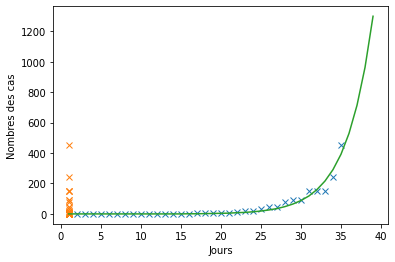

Infections :

Real data =  [2.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00
 5.0000e+00 5.0000e+00 6.0000e+00 6.0000e+00 6.0000e+00 6.0000e+00
 6.0000e+00 6.0000e+00 6.0000e+00 1.1000e+01 1.1000e+01 1.1000e+01
 1.1000e+01 1.1000e+01 1.1000e+01 1.1000e+01 1.2000e+01 1.2000e+01
 1.2000e+01 1.2000e+01 1.2000e+01 1.2000e+01 1.2000e+01 1.2000e+01
 1.2000e+01 1.2000e+01 1.4000e+01 1.8000e+01 3.8000e+01 5.7000e+01
 1.0000e+02 1.3000e+02 1.9100e+02 2.0400e+02 2.8800e+02 3.8000e+02
 6.5600e+02 9.5700e+02 1.1340e+03 1.2170e+03 1.7920e+03 2.2900e+03
 2.2900e+03 3.6780e+03 4.4870e+03 4.5230e+03 6.6680e+03 7.6990e+03
 9.1050e+03 1.0947e+04 1.2632e+04]
Prediction =  [16027 19492 23706 28831]
Erreur (+/-)=  1481


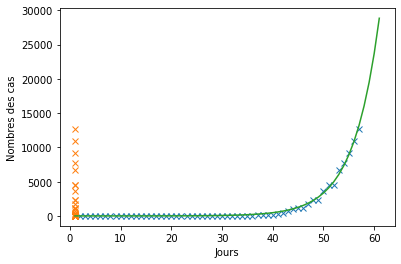

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Morocco : 

Deaths :
 
Real data =  [1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 3.]
Prediction =  [3 3 4 4]
Erreur (+/-)=  2


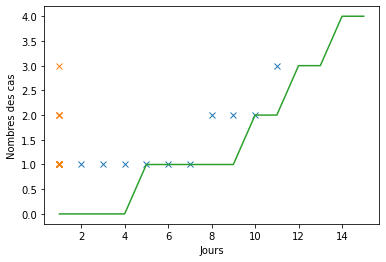

Infections :

Real data =  [ 1.  1.  1.  2.  2.  2.  2.  2.  3.  5.  6.  7. 17. 28. 29. 38. 49. 63.
 77.]
Prediction =  [104 135 176 229]
Erreur (+/-)=  11


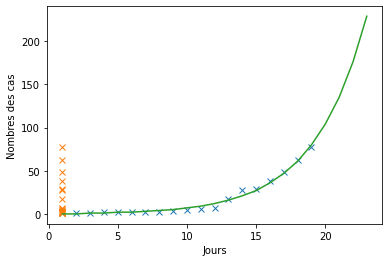

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Algeria : 

Deaths :
 
Real data =  [ 1.  2.  3.  4.  4.  4.  7.  9. 11.]
Prediction =  [14 18 23 29]
Erreur (+/-)=  2


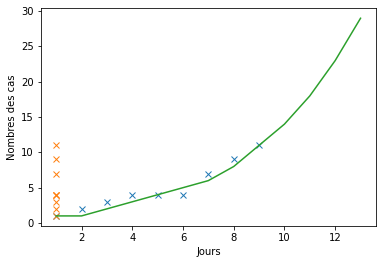

Infections :

Real data =  [ 1.  1.  1.  1.  1.  1.  3.  5. 12. 12. 17. 17. 19. 20. 20. 20. 24. 26.
 37. 48. 54. 60. 74. 87. 90.]
Prediction =  [111 130 151 177]
Erreur (+/-)=  17


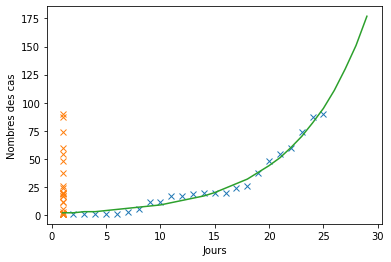

------------------------------------------------------------------------------------------


In [8]:
for pays in p_list1 :
     GLM_aux(pays)

# Modelisation :

Soit $N(t)$ le nombre de cas contaminés au temps t. On a la formule récurrente (simpliste) suivante qui décrit la dynamique du propagation de l'épidimie :  
$$ N_{n+1}=N_n+ E\cdot p\cdot N_n$$ 
avec : 
  - $p$ : la probabilité que le malade contamine ceux qui sont en contact avec lui , elle est liée fortement par exmemple aux gestes barrières adoptées par les gens.
  - $E$ : la moyenne des gens qui sont en contact avec le malade contaminé . 

Dans un premier temps , on considère $E$ et $p$ contstants par rapport au temps ( ce qui est faux ! ) mais cela va nous permettre d'avoir une idée sur la dynamique de COVID19.  On obtient : 
$$N_{n+1}=N_n+ E\cdot p\cdot N_n \Leftrightarrow N_n = (1+E\cdot p)^n N_0=(1+E\cdot p)^{n-n_0}N_{n_0}$$

In [0]:
def N1(n,E,p,data):
   return (1+E*p)**n * data[0]

infections,_=get_data('France')

In [10]:
infections

array([2.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 4.0000e+00,
       5.0000e+00, 5.0000e+00, 5.0000e+00, 6.0000e+00, 6.0000e+00,
       6.0000e+00, 6.0000e+00, 6.0000e+00, 6.0000e+00, 6.0000e+00,
       1.1000e+01, 1.1000e+01, 1.1000e+01, 1.1000e+01, 1.1000e+01,
       1.1000e+01, 1.1000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01,
       1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01,
       1.2000e+01, 1.2000e+01, 1.4000e+01, 1.8000e+01, 3.8000e+01,
       5.7000e+01, 1.0000e+02, 1.3000e+02, 1.9100e+02, 2.0400e+02,
       2.8800e+02, 3.8000e+02, 6.5600e+02, 9.5700e+02, 1.1340e+03,
       1.2170e+03, 1.7920e+03, 2.2900e+03, 2.2900e+03, 3.6780e+03,
       4.4870e+03, 4.5230e+03, 6.6680e+03, 7.6990e+03, 9.1050e+03,
       1.0947e+04, 1.2632e+04])

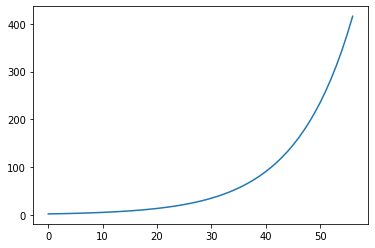

In [11]:
# Example 1  
E=1.
p=0.1
plt.plot([N1(i,E,p,infections) for i in range(len(infections))])

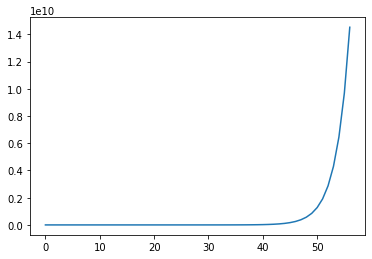

In [12]:
# Example 2
E=1.
p=0.5
plt.plot([N1(i,E,p,infections) for i in range(len(infections))])

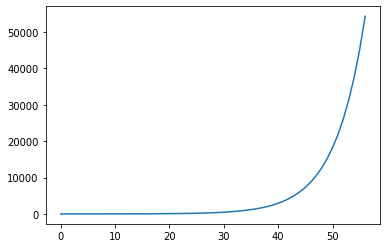

In [13]:
# Example 3
E=2.
p=0.1
plt.plot([N1(i,E,p,infections) for i in range(len(infections))])

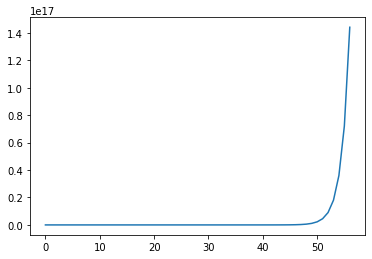

In [14]:
# Example 4
E=2.
p=0.5
plt.plot([N1(i,E,p,infections) for i in range(len(infections))])

In [15]:
Ep=[(0.1,0.5),(2,0.2),(5,0.1),(10,0.1),(100,0.8)]
for e in Ep :
  print("%.2e"%int(N1(50,e[0],e[1],infections)))

2.20e+01
4.05e+07
1.28e+09
2.25e+15
5.31e+95


|  E  |  p  |   N_10   |   N_50   |
|:---:|:---:|:--------:|:--------:|
| 0.1 | 0.5 |     3    |    22    |
|  2  | 0.2 | 5.70e+01 | 4.05e+07 |
|  5  | 0.1 | 1.15e+02 | 1.28e+09 |
|  10 | 0.6 | 2.05e+03 | 2.25e+15 |
| 100 | 0.8 | 2.43e+19 | 5.31e+95 |

On constate que $E$ et $p$ determine la vitesse de propagation , ce qui justifie les mesures prises par le gouvernements ( interdiction de rassemblement afin de diminuer $E$ )  et les gestes barrieres ( afin de diminuer $p$ ) . 

Dans notre modèle simpliste , on avait oublié ( mis à part la dépendance avec le temps de $E$ et $p$ ) le fait que $p$ est décroissante dans le temps et tend vers 0 : en effet, plus le virus est propagé , la probabilité de le transmettre à quelqu'un qui est déja contaminé est quasiment nulle . Donc, on doit prendre cela en compte , on posant : 
$$ p(t):=1 - \frac{N(t)}{n_{pop}}$$ 
avec $n_{pop}$ le nombre de population dans le cluster étudié ou plus géneralement dans tout le pays . 
Cela implique une nouvelle équation différentielle simple (en supposant toujours que $E$ est indépedant du temps $t$ , ce qui faux en géneral mais pratique ) : 


$$N_{n+1}-N_n = E\cdot p\cdot N_n\rightarrow  N^{\prime}(t)=E\cdot \left ( 1-\frac{N(t)}{n_{pop}}\right )N(t)$$
et $N(t_0)=N_0$ 

On peut écrire cette EDS comme : 
$$ N^{\prime}(t)= g(t,N(t))$$
avec $g(t,y):= E\cdot (1-\frac{y}{n_{pop}})y$ et $g$ vérifie bien les condition du théoreme de Cauchy-Lipschitz : D'ou l'existence et l'unicité de la solution.

On exhibe la solution sous forme d'une logistique, cad: 
$$ N(t)=\frac{a}{\alpha+b\cdot \exp(c\cdot t)} $$




On retrouve par un simple calcul :
$$N(t)=\frac{n_{pop}}{\alpha+\gamma _0\cdot \exp(E\cdot (t_0-t))}$$
avec $\gamma_0:=\frac{n_{pop}}{N(t_0)}-\alpha$



De meme pour $p$ : 
$$p(t):=1-\frac{N(t)}{n_{pop}}=1-\frac{1}{\alpha+\gamma _0\cdot \exp(E\cdot (t_0-t))}$$

In [16]:

infections[0]

2.0

In [0]:
def N2(t,t0,E,npop,alpha,data):
  gamma0=npop/data[3]-alpha
  return npop/(alpha+gamma0*np.exp(E*(t0-t)))

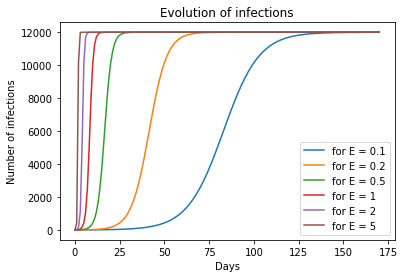

In [18]:
# Examples
npop=6*10**7
t0=0
alpha=5000
E_list=[0.1,0.2,0.5,1,2,5]
for E in E_list : 
  plt.plot([N2(i,t0,E,npop,alpha,infections) for i in range(3*len(infections))],label="for E = "+str(E))

plt.title("Evolution of infections")
plt.xlabel("Days")
plt.ylabel("Number of infections")
plt.legend()
plt.show()

Rappeleons que  : $$N(t)=\frac{a}{\alpha+b\cdot \exp(c\cdot t)}=\frac{\tilde{a}}{1+\exp(-\tilde{c}\cdot(t-\tilde{b}))}$$ 
Le but maintenant est de trouver les parametres $\tilde{a},\tilde{b}$ et $\tilde{c}$ pour nos données réelles . 
On note : $$\psi_t(\theta):=\frac{\theta_1}{1+\exp(-\theta_3\cdot(t-\theta_2))}$$
On doit calculer $\theta^*:=\left (\theta_0^*,\theta_1^*,\theta_2^*\right )$ tq $$ \theta^*= \textit{argmin}_{\theta} \sum_{i=1}^{n}\left | X_{t_i}-\psi_{t_i}(\theta) \right |^{2}$$
avec la méthode Gradient Descent par exemple . Ensuite on définit notre prédicteur de $N(t)$ par : 
$$\hat{N}(t):=\psi_t(\theta^*)$$

In [41]:
from scipy import optimize

def fit_bootstrap(p0, datax, datay, function, yerr_systematic=0.0):

    errfunc = lambda p, x, y: (function(x,p) - y)

    # Fit first time
    pfit, perr = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=0)


    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    sigma_res = np.std(residuals)

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)

    # 500 random data sets are generated and fitted
    ps = []
    for i in range(500):

        randomDelta = np.random.normal(0., sigma_err_total, len(datay))
        randomdataY = datay + randomDelta

        randomfit, randomcov = \
            optimize.leastsq(errfunc, p0, args=(datax, randomdataY),\
                             full_output=0)

        ps.append(randomfit) 

    ps = np.array(ps)
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1.5. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit
    return pfit_bootstrap, perr_bootstrap 

def sigmoid(x, pars):
    c = pars[0]
    a = pars[1]
    b = pars[2]
    return a / (1 + np.exp(-(x-b)*c))




SyntaxError: ignored

In [0]:
def extrapolation(data,pays,title):
        pstart = [2.43758048e-01, 4.31177862e+04, 1.95312145]

        ydata = data

        xdata = np.arange(len(ydata))
                  
        pfit, perr = fit_bootstrap(pstart, xdata, ydata, sigmoid)
        fig = plt.figure(figsize=(14, 7))
        ax = fig.add_subplot(111)
        # data réelle 
        ax.plot(xdata, ydata, '+', markersize=20,label="Real infections")
        # 
        ysim = sigmoid(xdata, pfit)
        ax.plot(xdata, ysim, '--', c = 'r')
        eroor=np.sqrt(sum((ydata-ysim[0:len(ydata)])**2))

        # Extrapolation
        xsim = np.linspace (len(xdata), 2*len(xdata))
        ysim = sigmoid(xsim, pfit)
        ax.plot(xsim, ysim, '--', c = 'r', label="Extrapolation")


        # l'Extrapolation maximale
        ysim_sup = sigmoid(xsim, pfit+perr)
        ax.plot(xsim, ysim_sup, '--', c = 'r', alpha = 0.2)

        # l'Extrapolation minimale

        ysim_inf = sigmoid(xsim, pfit-perr)
        ax.plot(xsim, ysim_inf, '--', c = 'r', alpha = 0.2)
        plt.fill_between(xsim, ysim_sup, ysim_inf, facecolor="red", alpha=0.1)
        attesi_inf = int(ysim_inf[-1])
        attesi_sup = int(ysim_sup[-1])
        plt.title("Total final number of "+title+" expected in "+pays+f": \n between {attesi_inf} et {attesi_sup} ", size=20)
        plt.legend()
        print(pays+" "+title+" :",data[-1],"--> Predicions =",ysim.astype(int)[:20])
        print("Eroor (+/-)= ",int(eroor))
        print('Parameter E = ',pfit[0])
        print("---"*20)

In [0]:
def prediction(pays):
       infection,deces=get_data(pays)
       extrapolation(infection,pays,'infections')
       #extrapolation(deces,pays,'death')


France infections : 12632.0 --> Predicions = [14560 16713 18782 20689 22383 23835 25046 26031 26816 27432 27910 28277
 28557 28768 28928 29048 29138 29206 29256 29294]
Eroor (+/-)=  1016
Parameter E =  0.2532977066591222
------------------------------------------------------------
Italy infections : 47021.0 --> Predicions = [51460 56512 61395 66015 70300 74203 77696 80777 83457 85763 87726 89383
 90773 91930 92889 93681 94333 94867 95305 95662]
Eroor (+/-)=  3048
Parameter E =  0.206431572165001
------------------------------------------------------------


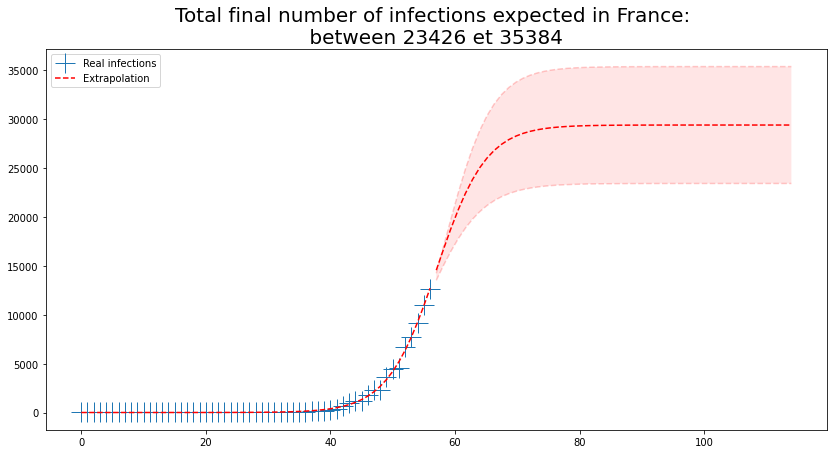

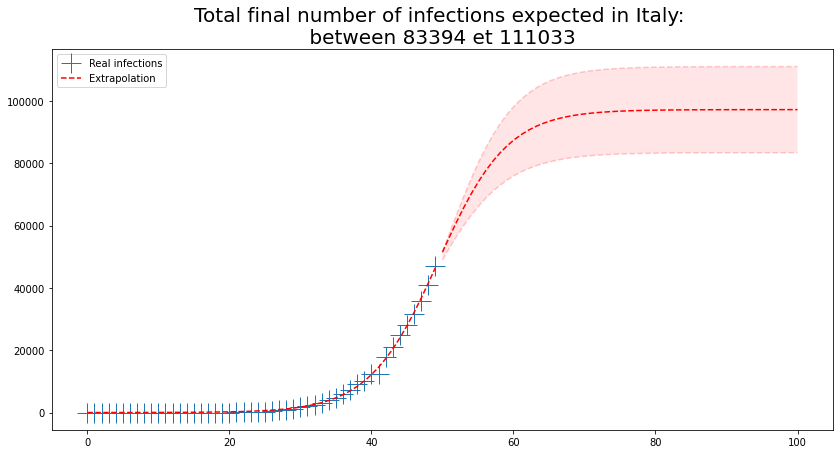

In [46]:
for pays in p_list2 : 
        prediction(pays)